## Exploration and visualisation of the data

In [39]:
import os
import csv
from PIL import Image
import pandas as pd
import numpy as np
from prettytable import PrettyTable

dataset_folder = os.getcwd() + '/Gemstones_dataset'

def count_images_per_category(root_dir):
    category_counts = {}
    for foldername in os.listdir(root_dir):
        folder_path = os.path.join(root_dir, foldername)
        if os.path.isdir(folder_path):
            category_counts[foldername] = len(os.listdir(folder_path))
    return category_counts

# Train count
train_folder = os.path.join(dataset_folder, 'train')
train_category_counts = count_images_per_category(train_folder)

# Test count
test_folder = os.path.join(dataset_folder, 'test')
test_category_counts = count_images_per_category(test_folder)

# Total count
combined_category_counts = {}
for category in sorted(set(list(train_category_counts.keys()) + list(test_category_counts.keys()))):
    combined_category_counts[category] = train_category_counts.get(category, 0) + test_category_counts.get(category, 0)

# Total count of all images
total_count = sum(combined_category_counts.values())

table = PrettyTable(['Category', 'Train Count', 'Test Count', 'Total Count'])
for category, count in combined_category_counts.items():
    train_count = train_category_counts.get(category, 0)
    test_count = test_category_counts.get(category, 0)
    table.add_row([category, train_count, test_count, count])

table.add_row(["Total", sum(train_category_counts.values()), sum(test_category_counts.values()), total_count])
print(table)

num_categories = len(combined_category_counts)
print(f"\nNumber of categories: {num_categories}")

+-------------------+-------------+------------+-------------+
|      Category     | Train Count | Test Count | Total Count |
+-------------------+-------------+------------+-------------+
|    Alexandrite    |      68     |     8      |      76     |
|     Almandine     |      62     |     8      |      70     |
|     Amazonite     |      64     |     8      |      72     |
|       Amber       |      62     |     8      |      70     |
|      Amethyst     |      70     |     8      |      78     |
|      Ametrine     |      70     |     8      |      78     |
|     Andalusite    |      64     |     8      |      72     |
|     Andradite     |      62     |     8      |      70     |
|     Aquamarine    |      72     |     10     |      82     |
|  Aventurine Green |      90     |     10     |     100     |
| Aventurine Yellow |      68     |     8      |      76     |
|     Benitoite     |      62     |     8      |      70     |
|    Beryl Golden   |      72     |     8      |      8

In [2]:
def get_extensions(folder_path):
    extensions = set()
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            extension = os.path.splitext(file)[1]
            extensions.add(extension)
    return extensions

dataset_extensions = get_extensions(dataset_folder)

print("Extensions of images:", dataset_extensions)

Extensions of images: {'.jpg'}


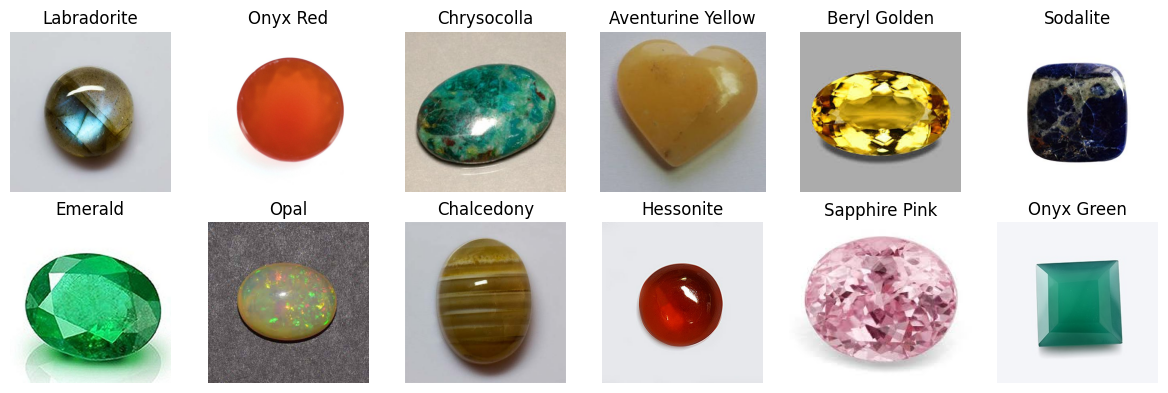

In [3]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_random_images(root_dir, num_images=12):
    fig, axes = plt.subplots(2, 6, figsize=(12, 4))
    categories = os.listdir(root_dir)
    for i in range(num_images):
        category = random.choice(categories)
        category_folder = os.path.join(root_dir, category)
        image_file = random.choice(os.listdir(category_folder))
        image_path = os.path.join(category_folder, image_file)
        img = mpimg.imread(image_path)
        ax = axes[i // 6, i % 6]
        ax.imshow(img)
        ax.set_title(category)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Show random images from train folder
train_folder = os.path.join(dataset_folder, 'train')
show_random_images(train_folder)

# Data preparation – Image manipulation

In [67]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from colorthief import ColorThief

# Set the target directory
target_dir = '.\\'

# Create a list to store the vectorized images and dominant colors
vectorized_images = []
labels = []

dominant_colors = []

# Loop through each sub-directory
for subdir, dirs, files in os.walk(target_dir):
    for file in files:
        # Check if the file is an image
        if file.endswith('.jpg'):
            # Construct the full file path
            file_path = os.path.join(subdir, file)
            
            # Open the image
            image = Image.open(file_path)
            
            # Remove the white background
            image = image.convert("RGBA")
            data = np.array(image)
            red, green, blue, alpha = data.T
            white_areas = (red > 200) & (blue > 200) & (green > 200)
            data[..., -1][white_areas.T] = 0
            image = Image.fromarray(data)
            
            # Crop the image to fit the subject
            bbox = image.getbbox()
            image = image.crop(bbox)
            
            # Resize the image to 128x128 pixels
            image = image.resize((128, 128))
            
            # Change the transparent pixels to white
            new_image = Image.new("RGBA", image.size, "WHITE") # Create a white rgba background
            new_image.paste(image, (0, 0), image)              # Paste the image on the background.
            image = new_image.convert('RGB')

            # Vectorize the image
            image_vector = np.array(image).flatten()
            
            # Add the vectorized image to the list
            vectorized_images.append(image_vector)
            labels.append(subdir.split("\\")[-1])

            # Save the resized image as PNG, due to issues with transparency
            new_file_path = os.path.join(subdir, f'{file.split(".")[0]}.png')
            image.save(new_file_path)
            
            
            # Get the dominant colors using ColorThief
            color_thief = ColorThief(new_file_path)
            dominant_color = color_thief.get_color(quality=1)

            dominant_colors.append(dominant_color)            
            # Close the image
            image.close()
            
            print(f'Resized {file} to 128x128 and saved as {new_file_path}')

# Convert the image data and labels to DataFrame
df = pd.DataFrame(vectorized_images)
df['label'] = labels

# Save DataFrame to CSV
#df.to_csv('image_data.csv', index=False)

Resized alexandrite_18.jpg to 128x128 and saved as .\Gemstones_dataset\test\Alexandrite\alexandrite_18.png
Resized alexandrite_28.jpg to 128x128 and saved as .\Gemstones_dataset\test\Alexandrite\alexandrite_28.png
Resized alexandrite_3.jpg to 128x128 and saved as .\Gemstones_dataset\test\Alexandrite\alexandrite_3.png
Resized alexandrite_6.jpg to 128x128 and saved as .\Gemstones_dataset\test\Alexandrite\alexandrite_6.png
Resized almandine_18.jpg to 128x128 and saved as .\Gemstones_dataset\test\Almandine\almandine_18.png
Resized almandine_28.jpg to 128x128 and saved as .\Gemstones_dataset\test\Almandine\almandine_28.png
Resized almandine_3.jpg to 128x128 and saved as .\Gemstones_dataset\test\Almandine\almandine_3.png
Resized almandine_9.jpg to 128x128 and saved as .\Gemstones_dataset\test\Almandine\almandine_9.png
Resized amazonite_18.jpg to 128x128 and saved as .\Gemstones_dataset\test\Amazonite\amazonite_18.png
Resized amazonite_28.jpg to 128x128 and saved as .\Gemstones_dataset\test\A

In [68]:
# Convert the list of dominant colors to DataFrame
df_dominant_colors = pd.DataFrame(dominant_colors, columns=['dominant_color_r', 'dominant_color_g', 'dominant_color_b'])

# Concatenate the image data DataFrame with dominant colors DataFrame
df_with_dominant = pd.concat([df, df_dominant_colors], axis=1)

# Save DataFrame with dominant colors to CSV
df_with_dominant.head()

,0,1,2,3,4,5,6,7,8,9,...,49146,49147,49148,49149,49150,49151,label,dominant_color_r,dominant_color_g,dominant_color_b
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,Alexandrite,71,105,109
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,Alexandrite,50,69,75
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,Alexandrite,23,76,75
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,Alexandrite,124,160,158
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,Almandine,53,27,32


In [69]:
def calculate_mean_every_third_column(df):
    num_columns = df.shape[1] - 1
    result_df = pd.DataFrame()
    for i in range(3):
        columns = [col for col in range(i, num_columns, 3)]
        result_df[i] = df.iloc[:, columns].mean(axis=1)
    result_df.columns = ['R', 'G', 'B']
    return pd.concat([df, result_df], axis=1)  # Concatenate original DataFrame with result DataFrame

df_with_mean = calculate_mean_every_third_column(df)
df_with_mean.head()

,0,1,2,3,4,5,6,7,8,9,...,49146,49147,49148,49149,49150,49151,label,R,G,B
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,Alexandrite,106.952820,132.058655,137.172119
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,Alexandrite,132.432068,152.336060,155.123108
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,Alexandrite,103.537109,143.356750,144.676941
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,Alexandrite,178.304138,194.855103,192.252930
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,Almandine,135.652283,99.142151,102.231140


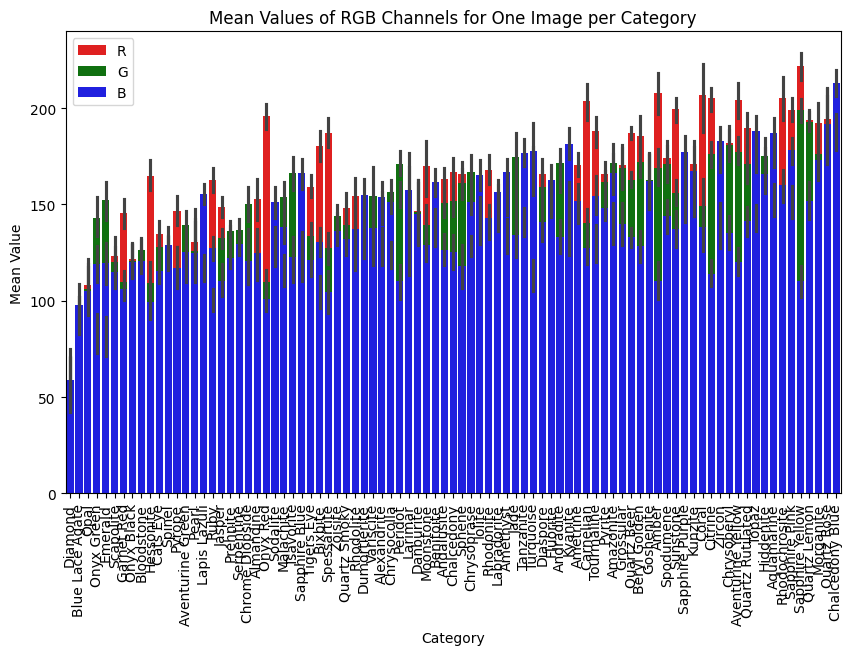

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
df_means = df_with_mean.groupby('label').mean().reset_index()

# Calculate the mean value from R, G, and B channels
df_means['mean_value'] = df_means[['R', 'G', 'B']].mean(axis=1)

# Sort the categories based on the mean value
df_means_sorted = df_means.sort_values(by='mean_value')

# Set the order of categories
category_order = df_means_sorted['label'].tolist()

# Plot using seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(data=df_with_mean, x='label', y='R', order=category_order, color='red', label='R')
sns.barplot(data=df_with_mean, x='label', y='G', order=category_order, color='green', label='G')
sns.barplot(data=df_with_mean, x='label', y='B', order=category_order, color='blue', label='B')
plt.title('Mean Values of RGB Channels for One Image per Category')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Mean Value')
plt.legend()
plt.show()

In [71]:
df_with_dominant.head()

,0,1,2,3,4,5,6,7,8,9,...,49146,49147,49148,49149,49150,49151,label,dominant_color_r,dominant_color_g,dominant_color_b
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,Alexandrite,71,105,109
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,Alexandrite,50,69,75
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,Alexandrite,23,76,75
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,Alexandrite,124,160,158
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,Almandine,53,27,32


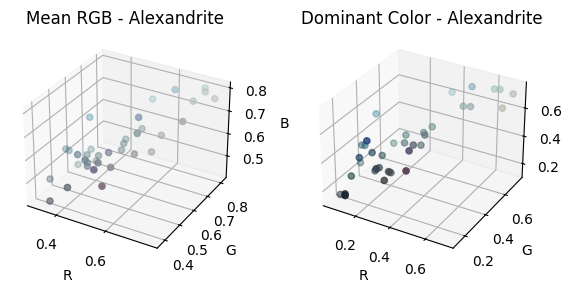

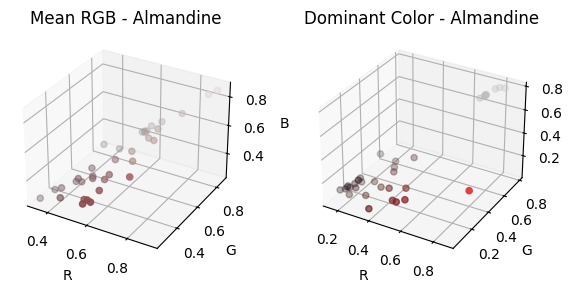

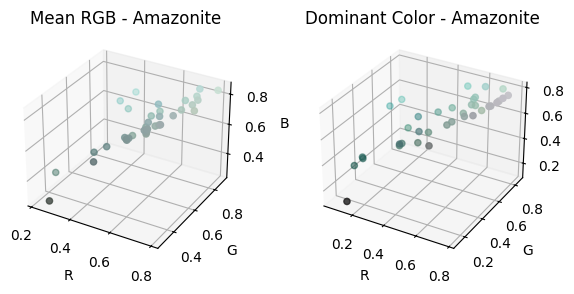

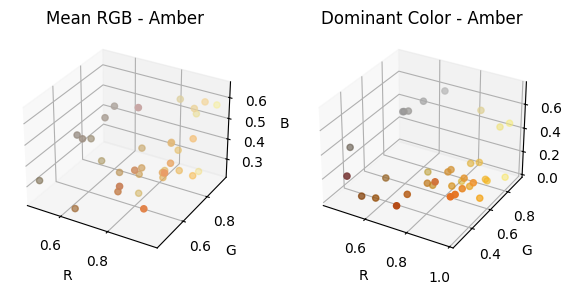

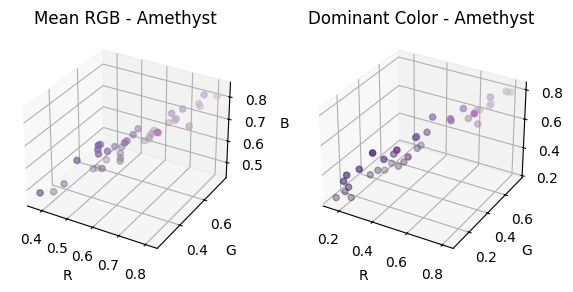

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Iterate over unique categories
for category in df_with_mean['label'].unique()[:5]:
    # Filter data for the current category for mean RGB
    mean_category_data = df_with_mean[df_with_mean['label'] == category]
    mean_colors = mean_category_data[['R', 'G', 'B']].values / 255.0  # Normalize to [0, 1]
    
    # Filter data for the current category for dominant color
    dominant_category_data = df_with_dominant[df_with_dominant['label'] == category]
    dominant_colors = dominant_category_data[['dominant_color_r', 'dominant_color_g', 'dominant_color_b']].values / 255.0  
    
    # Create a new figure with subplots
    fig, axs = plt.subplots(1, 2, figsize=(7, 3), subplot_kw={'projection': '3d'})
    
    # Plot the mean RGB values for the current category
    ax = axs[0]
    ax.scatter(mean_colors[:, 0], mean_colors[:, 1], mean_colors[:, 2], c=mean_colors)
    ax.set_title("Mean RGB - " + str(category))
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    
    # Plot the dominant RGB values for the current category
    ax = axs[1]
    ax.scatter(dominant_colors[:, 0], dominant_colors[:, 1], dominant_colors[:, 2], c=dominant_colors)
    ax.set_title("Dominant Color - " + str(category))
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    
    # Show the plot
    plt.show()


In [77]:
# Encoding the labels column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

print(df)

        0    1    2    3    4    5    6    7    8    9  ...  49143  49144  \
0     255  255  255  255  255  255  255  255  255  255  ...    255    255   
1     255  255  255  255  255  255  255  255  255  255  ...    255    255   
2     255  255  255  255  255  255  255  255  255  255  ...    255    255   
3     255  255  255  255  255  255  255  255  255  255  ...    255    255   
4     255  255  255  255  255  255  255  255  255  255  ...    255    255   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
3214  174  174  174  175  175  175  175  175  175  176  ...    181    181   
3215  255  255  255  255  255  255  255  255  255  255  ...    255    255   
3216  255  255  255  255  255  255  255  255  255  255  ...    255    255   
3217  255  255  255  255  255  255  255  255  255  255  ...    255    255   
3218  170  170  168  168  168  166  165  165  163  164  ...    142    142   

      49145  49146  49147  49148  49149  49150  49151  label  
0       255 

#### Normalizing data

In [78]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop(columns=['label'])  # Dropping the label column
X.columns = X.columns.astype(str)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_df['label'] = df['label']

scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2375776397515528


In [10]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, 
                                                          y,
                                                          random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, 
                                                  random_state=43)
print("Size of training set:{}".format(X_train.shape[0]))
print("Size of validation set:{}".format(X_val.shape[0]))
print("Size of test set:{}".format(X_test.shape[0]))

Size of training set:1810
Size of validation set:604
Size of test set:805


In [11]:
from sklearn.neighbors import KNeighborsClassifier
best_score = 0
for num_neighbors in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    knn.fit(X_train, y_train)
    
    score = knn.score(X_val, y_val)
    
    if score>best_score:
        best_score = score
        best_num_neighbors = num_neighbors

knn = KNeighborsClassifier(n_neighbors=best_num_neighbors)
knn.fit(X_trainval, y_trainval)

print("Best number of neighbors found: {}".format(
    best_num_neighbors))
print("Best score on validation set: {}".format(best_score))
print("Score on training/validation set: {}".format(
    knn.score(X_trainval, y_trainval)))
print("Score on test set: {}".format(knn.score(X_test, 
                                               y_test)))

Best number of neighbors found: 1
Best score on validation set: 0.29304635761589404
Score on training/validation set: 0.9987572493786246
Score on test set: 0.3341614906832298


In [12]:
from sklearn.metrics import classification_report, confusion_matrix
knn_pred = knn.predict(X_test)

# Calculate and print accuracy
test_accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy on test set:", test_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(knn_pred, y_test))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(knn_pred, y_test))

Accuracy on test set: 0.3341614906832298
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.45      0.62      0.53         8
           2       0.18      0.11      0.13        19
           3       0.27      1.00      0.43         3
           4       0.00      0.00      0.00         3
           5       0.07      0.50      0.12         2
           6       0.10      1.00      0.18         1
           7       0.14      0.67      0.24         3
           8       0.00      0.00      0.00         6
           9       0.82      0.26      0.40        34
          10       0.78      0.58      0.67        12
          11       0.22      1.00      0.36         2
          12       0.08      0.20      0.12         5
          13       0.36      0.67      0.47         6
          14       0.00      0.00      0.00        11
          15       0.88      0.70      0.78        10
          16     

c:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the testing set
rf_pred = rf_classifier.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy on test set:", rf_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(rf_pred, y_test))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(rf_pred, y_test))

Accuracy on test set: 0.38633540372670805
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.36      0.57      0.44         7
           2       0.18      0.67      0.29         3
           3       0.55      0.33      0.41        18
           4       0.11      0.17      0.13         6
           5       0.21      0.33      0.26         9
           6       0.20      0.29      0.24         7
           7       0.00      0.00      0.00         0
           8       0.11      0.06      0.08        16
           9       0.91      0.48      0.62        21
          10       0.67      0.60      0.63        10
          11       0.22      0.67      0.33         3
          12       0.08      0.14      0.11         7
          13       0.45      0.45      0.45        11
          14       0.38      0.16      0.22        19
          15       0.88      0.58      0.70        12
          16    

c:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [3]:
import os
import csv
from PIL import Image
import pandas as pd
import numpy as np
from prettytable import PrettyTable

df = pd.read_csv('image_data.csv')


NameError: name 'LabelEncoder' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

X = df.drop(columns=['label'])  # Dropping the label column

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_df['label'] = df['label']

In [5]:
def calculate_mean_every_third_column(df):
    num_columns = df.shape[1]
    result_df = pd.DataFrame()
    for i in range(3):
        columns = [col for col in range(i, num_columns, 3)]
        result_df[i] = df.iloc[:, columns].mean(axis=1)
    result_df.columns = ['R', 'G', 'B']
    return pd.concat([df, result_df], axis=1)  # Concatenate original DataFrame with result DataFrame

df_with_mean = calculate_mean_every_third_column(scaled_df)
print(df_with_mean)

             0         1         2         3         4         5         6  \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
4     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
...        ...       ...       ...       ...       ...       ...       ...   
3214  0.682353  0.682353  0.682353  0.686275  0.686275  0.686275  0.686275   
3215  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3216  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3217  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3218  0.666667  0.666667  0.658824  0.658824  0.658824  0.650980  0.647059   

             7         8         9  ...     49146     49147    

In [6]:
df_with_mean.head()

,0,1,2,3,4,5,6,7,8,9,...,49146,49147,49148,49149,49150,49151,label,R,G,B
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0,0.419397,0.517877,0.537930
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0,0.519310,0.597396,0.608326
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0,0.406003,0.562183,0.567361
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0,0.699189,0.764138,0.753933
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1,0.531998,0.388793,0.400906


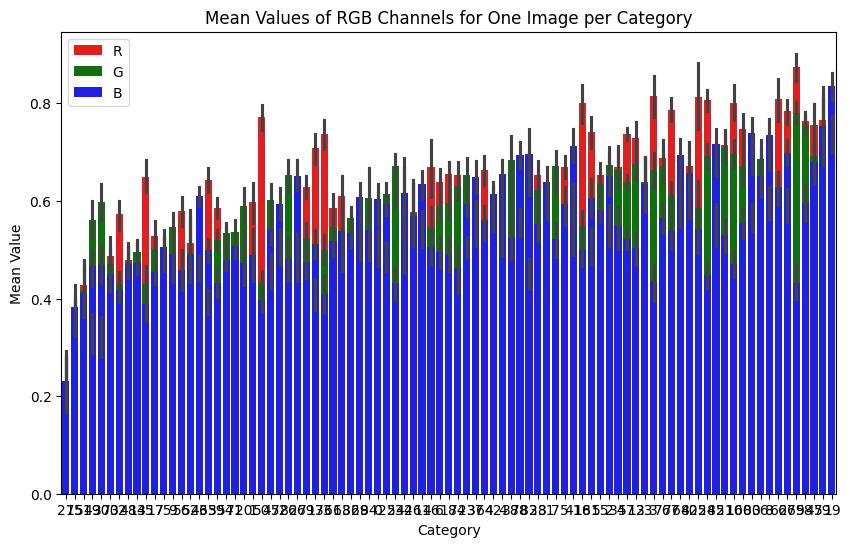

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
df_means = df_with_mean.groupby('label').mean().reset_index()

# Calculate the mean value from R, G, and B channels
df_means['mean_value'] = df_means[['R', 'G', 'B']].mean(axis=1)

# Sort the categories based on the mean value
df_means_sorted = df_means.sort_values(by='mean_value')

# Set the order of categories
category_order = df_means_sorted['label'].tolist()

# Plot using seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(data=df_with_mean, x='label', y='R', order=category_order, color='red', label='R')
sns.barplot(data=df_with_mean, x='label', y='G', order=category_order, color='green', label='G')
sns.barplot(data=df_with_mean, x='label', y='B', order=category_order, color='blue', label='B')
plt.title('Mean Values of RGB Channels for One Image per Category')
plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

In [87]:
from sklearn.model_selection import train_test_split

X = scaled_df.drop(columns=['label'])
y = scaled_df['label']

X_trainval, X_test, y_trainval, y_test = train_test_split(X, 
                                                          y,
                                                          random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, 
                                                  random_state=43, stratify=y_trainval)
print("Size of training set:{}".format(X_train.shape[0]))
print("Size of validation set:{}".format(X_val.shape[0]))
print("Size of test set:{}".format(X_test.shape[0]))

from sklearn.neighbors import KNeighborsClassifier
best_score = 0
for num_neighbors in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    knn.fit(X_train, y_train)
    
    score = knn.score(X_val, y_val)
    
    if score>best_score:
        best_score = score
        best_num_neighbors = num_neighbors

knn = KNeighborsClassifier(n_neighbors=best_num_neighbors)
knn.fit(X_trainval, y_trainval)

print("Best number of neighbors found: {}".format(
    best_num_neighbors))
print("Best score on validation set: {}".format(best_score))
print("Score on training/validation set: {}".format(
    knn.score(X_trainval, y_trainval)))
print("Score on test set: {}".format(knn.score(X_test, 
                                               y_test)))

from sklearn.metrics import classification_report, confusion_matrix
knn_pred = knn.predict(X_test)

# Calculate and print accuracy
test_accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy on test set:", test_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(knn_pred, y_test))

Size of training set:1810
Size of validation set:604
Size of test set:805
Best number of neighbors found: 1
Best score on validation set: 0.32450331125827814
Score on training/validation set: 0.9983429991714996
Score on test set: 0.33664596273291925


NameError: name 'accuracy_score' is not defined

Neighbors: 1, Train Accuracy: 0.9983425414364641, Test Accuracy: 0.31180124223602484
Neighbors: 2, Train Accuracy: 0.6508287292817679, Test Accuracy: 0.25590062111801243
Neighbors: 3, Train Accuracy: 0.5392265193370166, Test Accuracy: 0.26211180124223604
Neighbors: 4, Train Accuracy: 0.47734806629834253, Test Accuracy: 0.26211180124223604
Neighbors: 5, Train Accuracy: 0.43867403314917125, Test Accuracy: 0.2571428571428571
Neighbors: 6, Train Accuracy: 0.4154696132596685, Test Accuracy: 0.25838509316770186
Neighbors: 7, Train Accuracy: 0.3867403314917127, Test Accuracy: 0.2422360248447205
Neighbors: 8, Train Accuracy: 0.36574585635359114, Test Accuracy: 0.2496894409937888
Neighbors: 9, Train Accuracy: 0.35303867403314915, Test Accuracy: 0.24596273291925466
Neighbors: 10, Train Accuracy: 0.35027624309392263, Test Accuracy: 0.25093167701863356
Neighbors: 11, Train Accuracy: 0.33812154696132596, Test Accuracy: 0.25093167701863356
Neighbors: 12, Train Accuracy: 0.32541436464088397, Test Acc

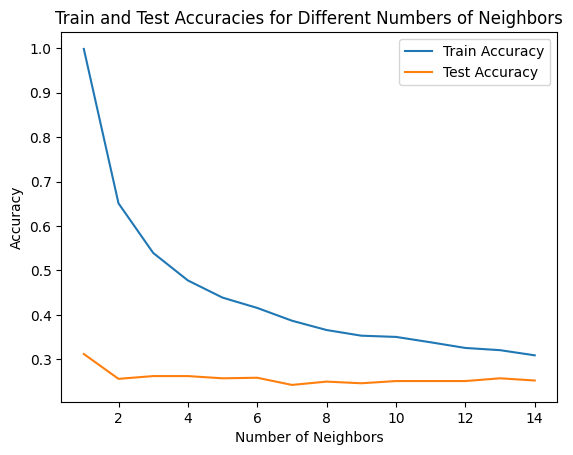

In [89]:
import matplotlib.pyplot as plt

train_accuracies = []
test_accuracies = []

for num_neighbors in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    knn.fit(X_train, y_train)

    train_accuracy = knn.score(X_train, y_train)
    test_accuracy = knn.score(X_test, y_test)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"Neighbors: {num_neighbors}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

plt.plot(range(1, 15), train_accuracies, label='Train Accuracy')
plt.plot(range(1, 15), test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies for Different Numbers of Neighbors')
plt.legend()
plt.show()

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the testing set
rf_pred = rf_classifier.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy on test set:", rf_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(rf_pred, y_test))

Accuracy on test set: 0.4111801242236025
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.11      0.20      0.14         5
           2       0.44      0.36      0.40        11
           3       0.11      0.25      0.15         4
           4       0.10      0.17      0.12         6
           5       0.30      0.50      0.38         6
           6       0.22      0.50      0.31         4
           7       0.00      0.00      0.00         5
           8       0.30      0.25      0.27        12
           9       0.92      0.48      0.63        25
          10       0.78      0.44      0.56        16
          11       0.33      0.60      0.43         5
          12       0.30      0.43      0.35         7
          13       0.50      0.33      0.40        15
          14       0.20      0.29      0.24         7
          15       0.82      0.69      0.75        13
          16     

c:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # You can adjust max_iter based on convergence

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = logreg.predict(X_val)

# Evaluate the model
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Once you're satisfied with the model's performance, you can evaluate it on the test set
y_test_pred = logreg.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_pred, y_test))

Validation Accuracy: 0.42549668874172186
Test Accuracy: 0.4074534161490683
Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.11      0.11         9
           1       0.22      0.50      0.31         4
           2       0.44      0.24      0.31        17
           3       0.11      0.12      0.12         8
           4       0.50      0.38      0.43        13
           5       0.40      0.36      0.38        11
           6       0.22      0.22      0.22         9
           7       0.22      1.00      0.36         2
           8       0.20      0.20      0.20        10
           9       0.85      0.52      0.65        21
          10       0.78      0.41      0.54        17
          11       0.33      0.27      0.30        11
          12       0.20      0.29      0.24         7
          13       0.60      0.35      0.44        17
          14       0.20      0.40      0.27         5
          15       0.91      0.53    

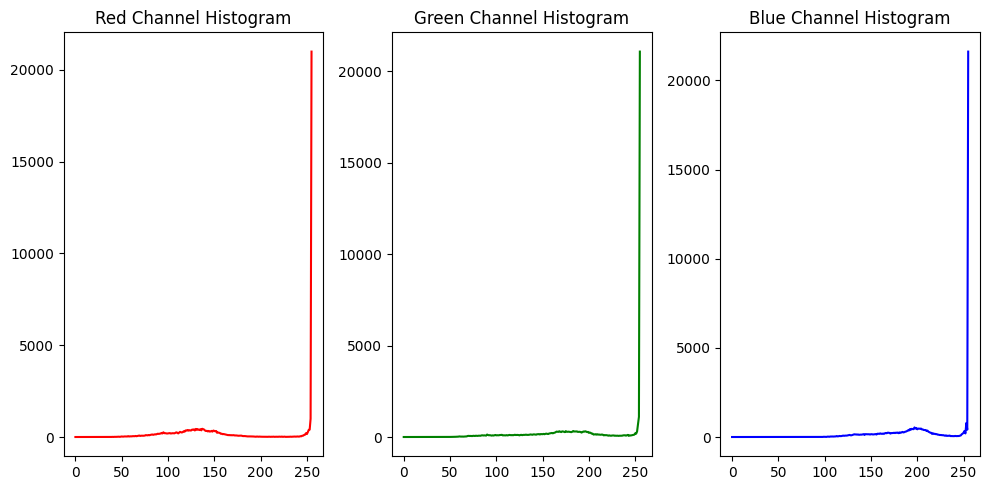

In [109]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('C:/Users/natal/OneDrive - ViaUC/Documents/BPR1/Mal/Final project/Gemstones_dataset/train/Alexandrite/alexandrite_0.jpg')

# Convert the image to RGB (if it's in BGR format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Extract color channels
r_channel = image[:, :, 0]
g_channel = image[:, :, 1]
b_channel = image[:, :, 2]

# Calculate histograms
r_hist = cv2.calcHist([r_channel], [0], None, [256], [0, 256])
g_hist = cv2.calcHist([g_channel], [0], None, [256], [0, 256])
b_hist = cv2.calcHist([b_channel], [0], None, [256], [0, 256])

# Plot histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(r_hist, color='red')
plt.title('Red Channel Histogram')

plt.subplot(1, 3, 2)
plt.plot(g_hist, color='green')
plt.title('Green Channel Histogram')

plt.subplot(1, 3, 3)
plt.plot(b_hist, color='blue')
plt.title('Blue Channel Histogram')

plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

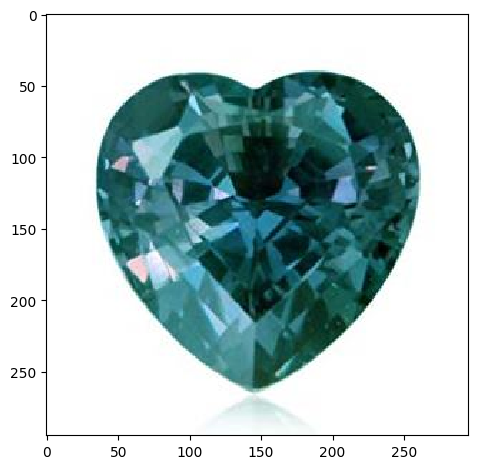

In [4]:
image1 = imread('C:/Users/natal/OneDrive - ViaUC/Documents/BPR1/Mal/Final project/Gemstones_dataset/test/Alexandrite/alexandrite_3.jpg')
imshow(image1);

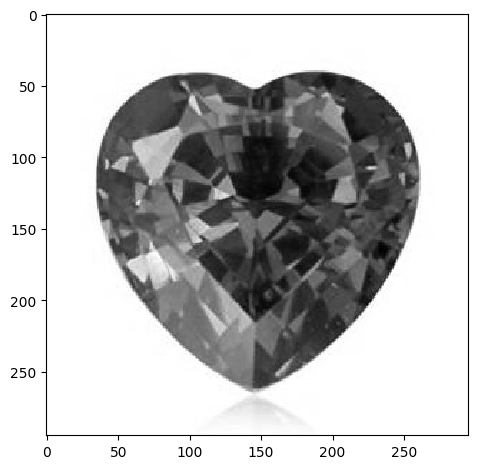

In [6]:
image2 = imread('Gemstones_dataset/test/Alexandrite/alexandrite_3.jpg', as_gray=True)
imshow(image2);

In [8]:
print(image1.shape)
print(image2.shape)
print(image1.size)
print(image2.size)

(295, 295, 3)
(295, 295)
261075
87025


In [13]:
pixel_feat1 = np.reshape(image2, (295, 295))
pixel_feat1

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [14]:
pixel_feat2 = np.reshape(image1, (295 * 295 * 3))
pixel_feat2

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

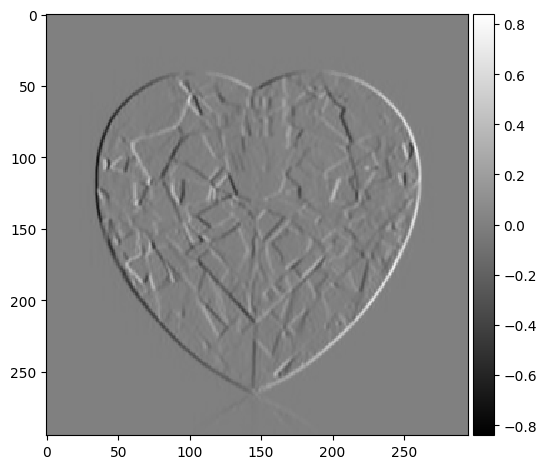

In [17]:
from skimage import filters
from skimage import feature

def prewitt_h(image):
    return filters.prewitt_h(image)

def prewitt_v(image):
    return filters.prewitt_v(image)

# prewitt kernel
pre_hor = prewitt_h(image2)
pre_ver = prewitt_v(image2)

# Sobel Kernel
ed_sobel = filters.sobel(image2)

#canny algorithm
can = feature.canny(image2)

imshow(pre_ver, cmap='gray');

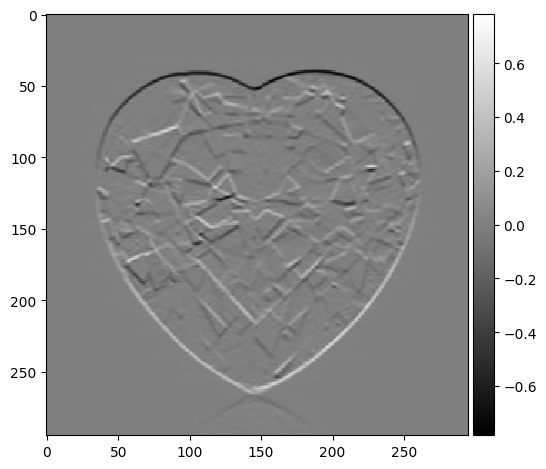

In [18]:
imshow(pre_hor, cmap='gray')

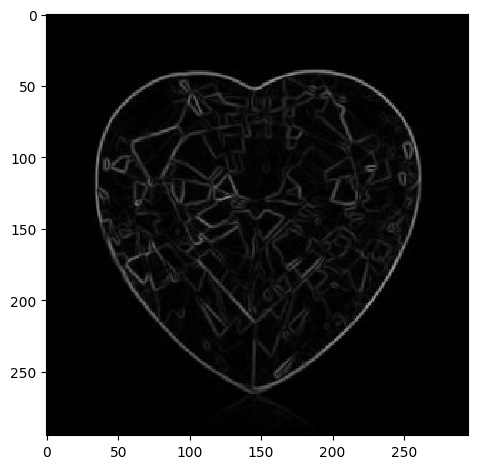

In [20]:
imshow(ed_sobel, cmap='gray')

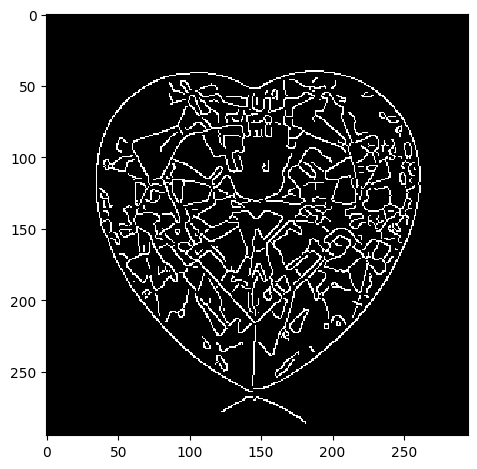

In [22]:
imshow(can, cmap='gray')

Text(0.5, 1.0, 'histogram of gray values')

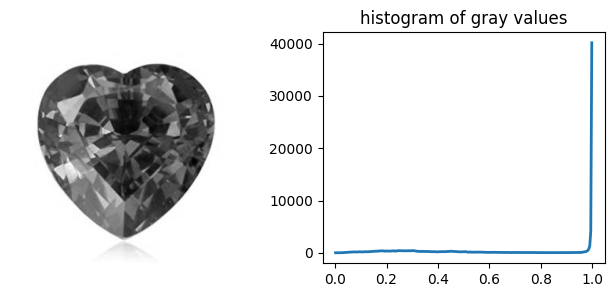

In [23]:
from skimage.exposure import histogram
hist, hist_centers = histogram(image2)

#Plotting the Image and the Histogram of gray values
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(image2, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')



In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from PIL import Image

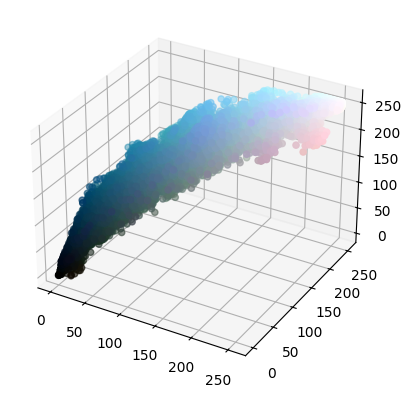

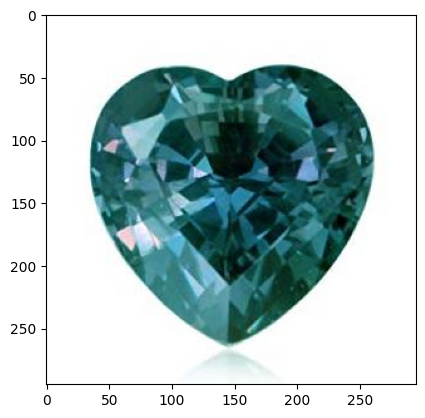

In [28]:
im = Image.open("C:/Users/natal/OneDrive - ViaUC/Documents/BPR1/Mal/Final project/Gemstones_dataset/test/Alexandrite/alexandrite_3.jpg")
px = im.load()

ax = plt.axes(projection = '3d')

x = []
y = []
z = []
c = []

for row in range(0,im.height):
    for col in range(0, im.width):
        pix = px[col,row]
        x.append(pix[0])
        y.append(pix[1])
        z.append(pix[2])
        c.append((pix[0] / 255, pix[1] / 255, pix[2] / 255))

for row in range(0,im.height):
    for col in range(0, im.width):
        pix = px[col,row]
        newCol = (pix[0] / 255, pix[1] / 255, pix[2] / 255)

        if(not newCol in c):
            x.append(pix[0])
            y.append(pix[1])
            z.append(pix[2])
            c.append(newCol)

ax.scatter(x,y,z, c = c)
plt.show()



In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_df.iloc[:, :-1], scaled_df['label'],
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(2414, 49152)
(805, 49152)


In [95]:
# Perform PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
# fit PCA model to beast cancer data
pca.fit(scaled_df.iloc[:, :-1])

# transform data onto the first two principal components
X_pca = pca.transform(scaled_df.iloc[:, :-1])
print("Original shape: {}".format(str(scaled_df.iloc[:, :-1].shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))


Original shape: (3219, 49152)
Reduced shape: (3219, 2)


In [96]:
pca.explained_variance_ratio_

array([0.25712917, 0.15650147])

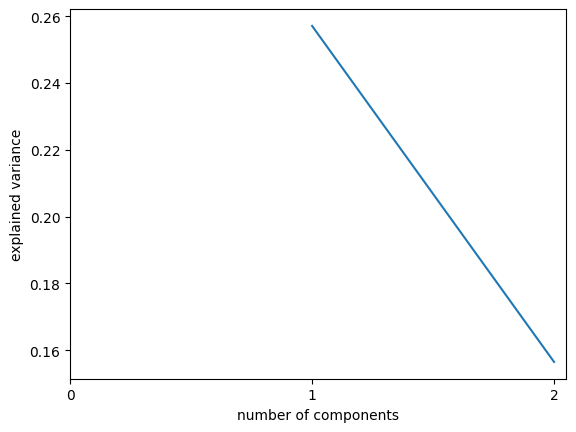

In [97]:
plt.plot(list(range(1, 1 + len(pca.explained_variance_ratio_))), pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.xticks(np.arange(0, 1 + len(pca.explained_variance_ratio_), step=1))
plt.show()

Text(0, 0.5, 'Second principal component')

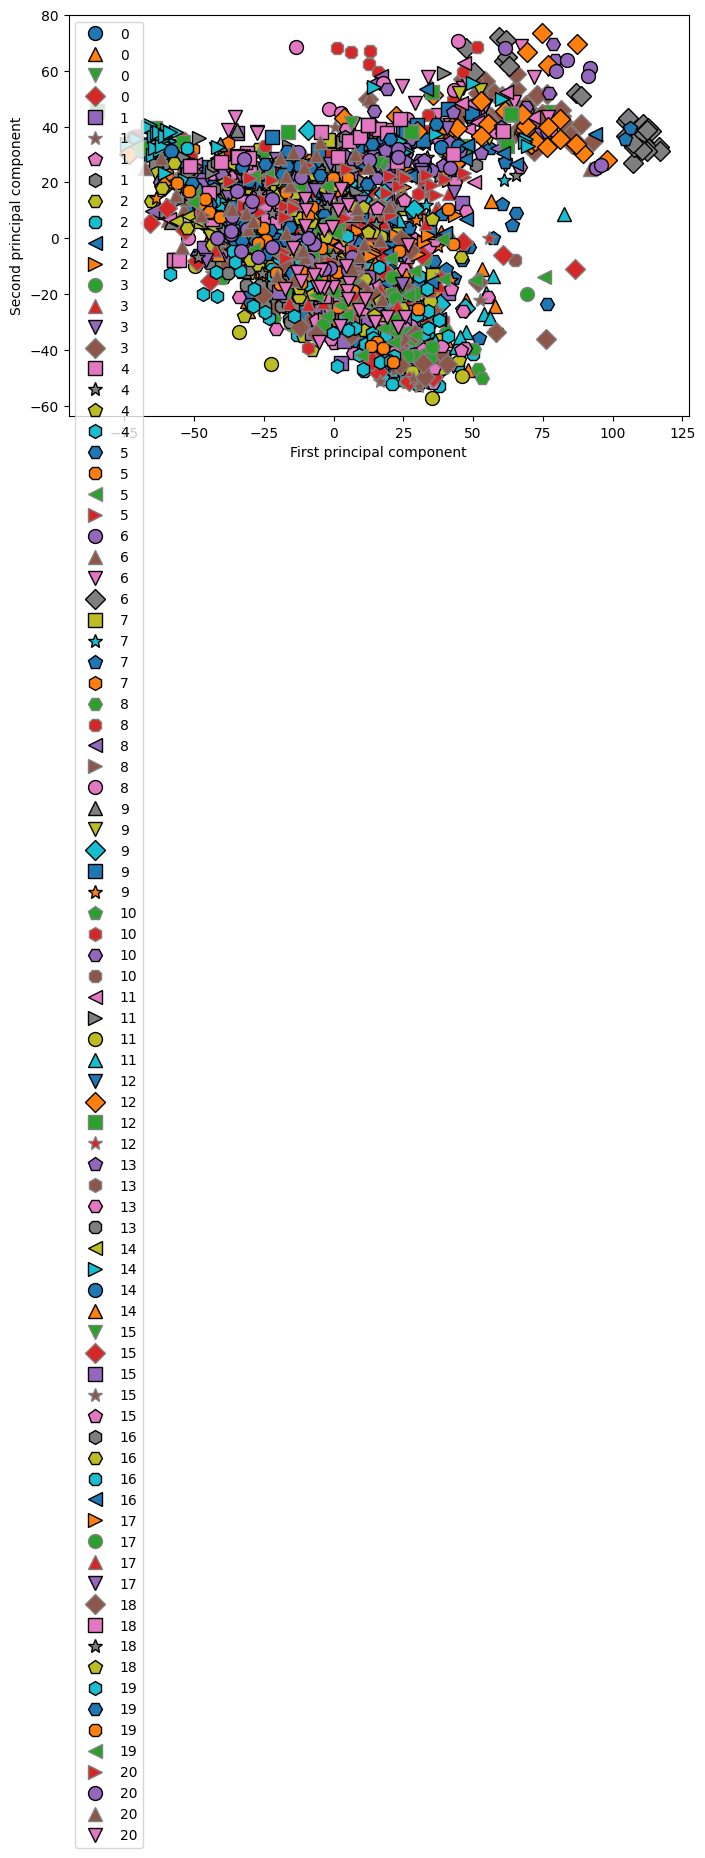

In [98]:
import mglearn
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], df['label'])
plt.legend(df['label'], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [99]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity= 30, random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(scaled_df.iloc[:, :-1])

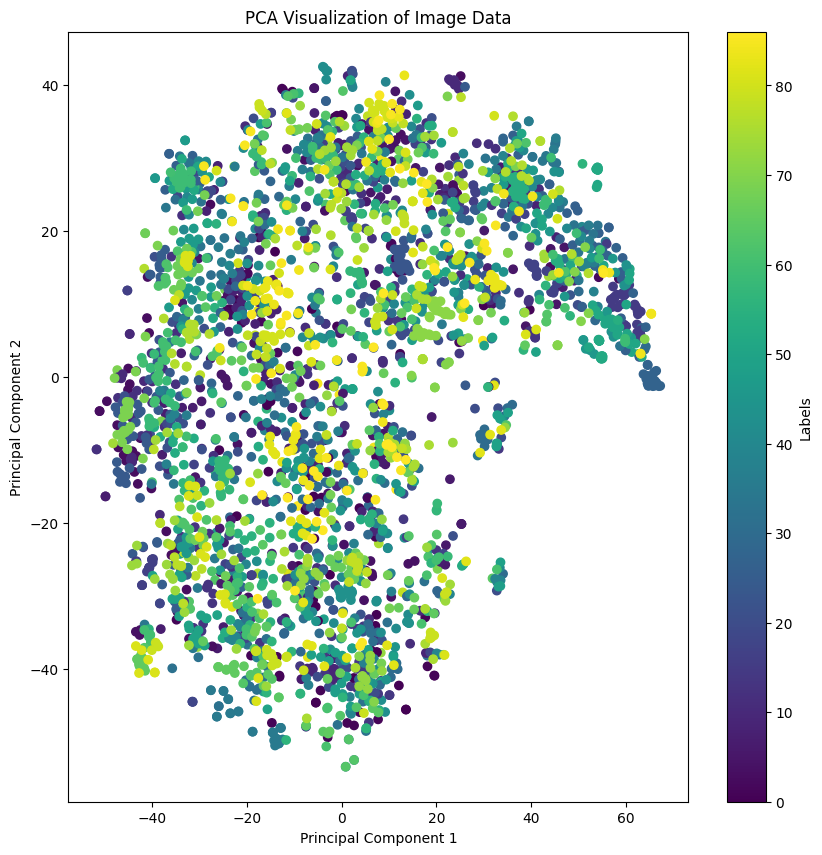

In [100]:
pca_components = df.iloc[:, :-1].values
labels = df['label'].values

# Plot the PCA components
plt.figure(figsize=(10, 10))
plt.scatter(digits_tsne[:, 0], digits_tsne[:, 1], c=labels, cmap='viridis')


plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Image Data")
plt.colorbar(label='Labels')
plt.show()

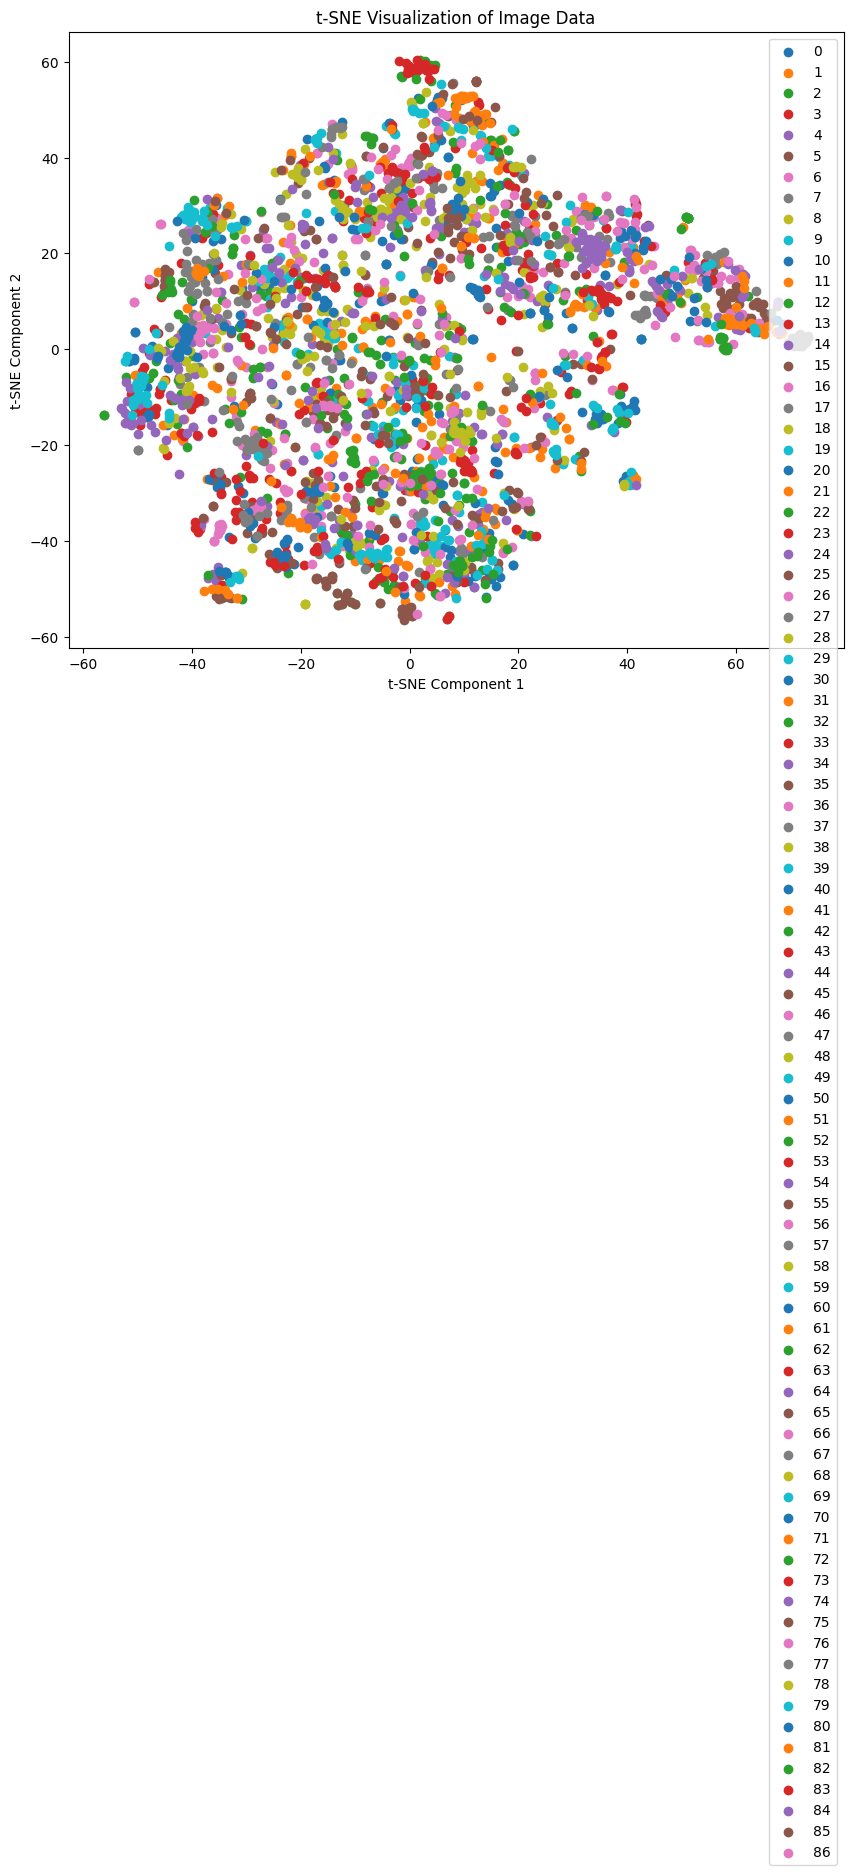

In [102]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the image data

# Separate features (image vectors) from labels
X = df.drop('label', axis=1)
labels = df['label']

# Perform PCA
pca = PCA(n_components=50)  # You can adjust the number of components as needed
X_pca = pca.fit_transform(X)

# Perform t-SNE
tsne = TSNE(n_components=2)  # You can adjust the number of components as needed
X_tsne = tsne.fit_transform(X_pca)  # Apply t-SNE on PCA-transformed data

# Visualize t-SNE embeddings
plt.figure(figsize=(10, 8))
for label in labels.unique():
    plt.scatter(X_tsne[labels == label, 0], X_tsne[labels == label, 1], label=label)
plt.title('t-SNE Visualization of Image Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()